In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
#df = df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [8]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
df.shape

(200, 3)

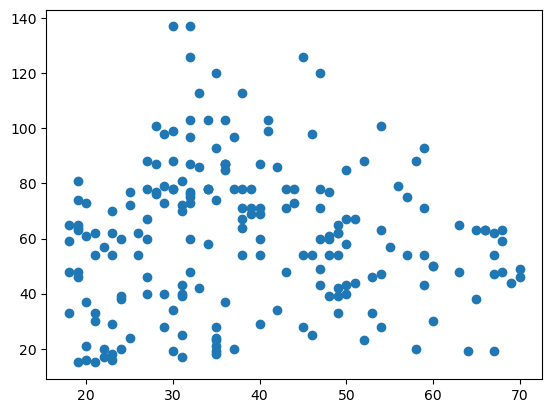

In [10]:
plt.scatter(df.age, df.income)
plt.show()

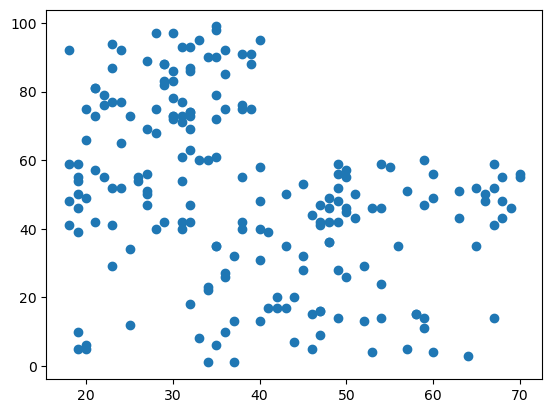

In [11]:
plt.scatter(df.age, df.score)
plt.show()

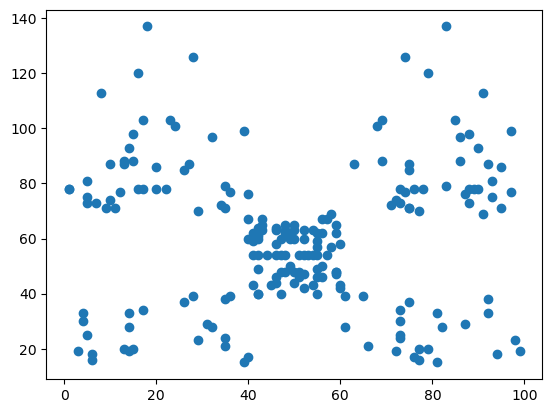

In [12]:
plt.scatter(df.score, df.income)
plt.show()

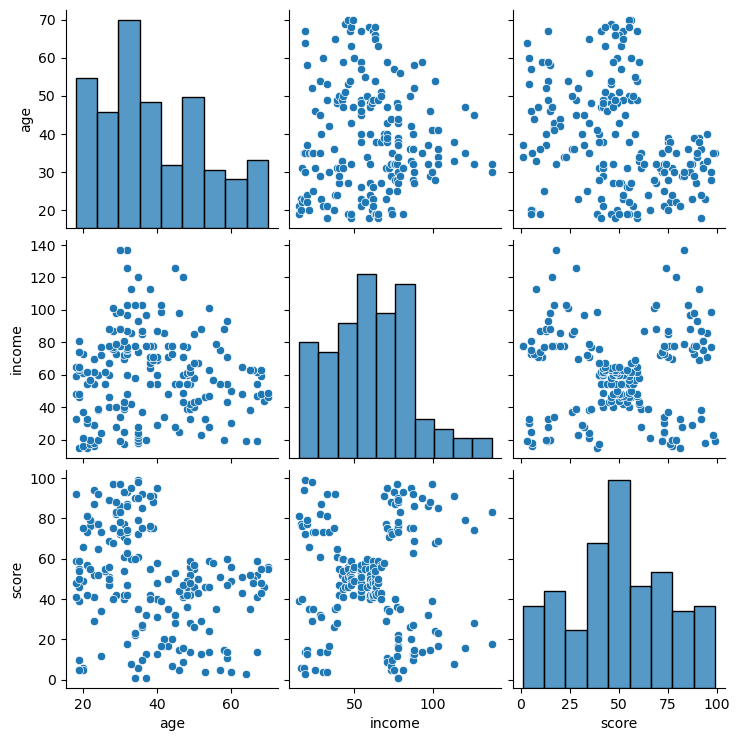

In [13]:
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

[KMeans Cluster](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Download this Cheatsheet](https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection/blob/main/Other%20Docs/Clustering%20Algorithms.pdf)

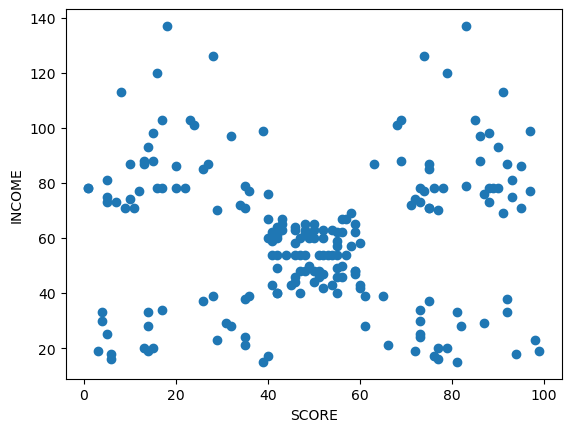

In [14]:
plt.scatter(df.score, df.income) 
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [15]:
# https://prnt.sc/K9UUIaqJEf2G

In [16]:
from sklearn.cluster import KMeans
km1 = KMeans() #default cluster = 8

In [17]:
km1.fit_predict(df[['income', 'score']])

array([7, 3, 4, 3, 7, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 7, 3, 7, 3, 7, 3,
       4, 3, 4, 3, 7, 3, 7, 3, 4, 3, 4, 3, 4, 3, 4, 3, 7, 3, 7, 3, 7, 6,
       7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5])

In [18]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [19]:
df['km1_cluster'] = km1.fit_predict(df[['income', 'score']])
df.head()

,age,income,score,km1_cluster
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


In [20]:
km1.predict([[20, 37]])

array([2])

In [21]:
km1.cluster_centers_

array([[ 79.73913043,  13.39130435],
       [ 63.36363636,  47.38636364],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [ 78.55172414,  82.17241379],
       [ 46.73809524,  50.78571429],
       [109.7       ,  82.        ],
       [109.7       ,  22.        ]])

In [22]:
df8 = df[df.km1_cluster==7]

In [23]:
df8

,age,income,score,km1_cluster
180,37,97,32,7
182,46,98,15,7
184,41,99,39,7
186,54,101,24,7
188,41,103,17,7
190,34,103,23,7
192,33,113,8,7
194,47,120,16,7
196,45,126,28,7
198,32,137,18,7


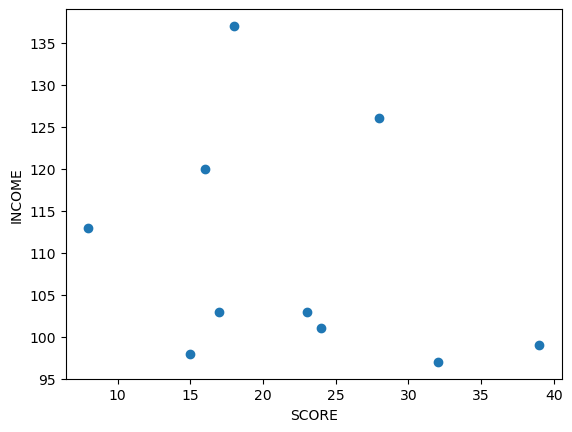

In [24]:
plt.scatter(df8.score, df8.income) 
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [26]:
df1 = df[df.km1_cluster==0]
df2 = df[df.km1_cluster==1]
df3 = df[df.km1_cluster==2]
df4 = df[df.km1_cluster==3]
df5 = df[df.km1_cluster==4]
df6 = df[df.km1_cluster==5]
df7 = df[df.km1_cluster==6]

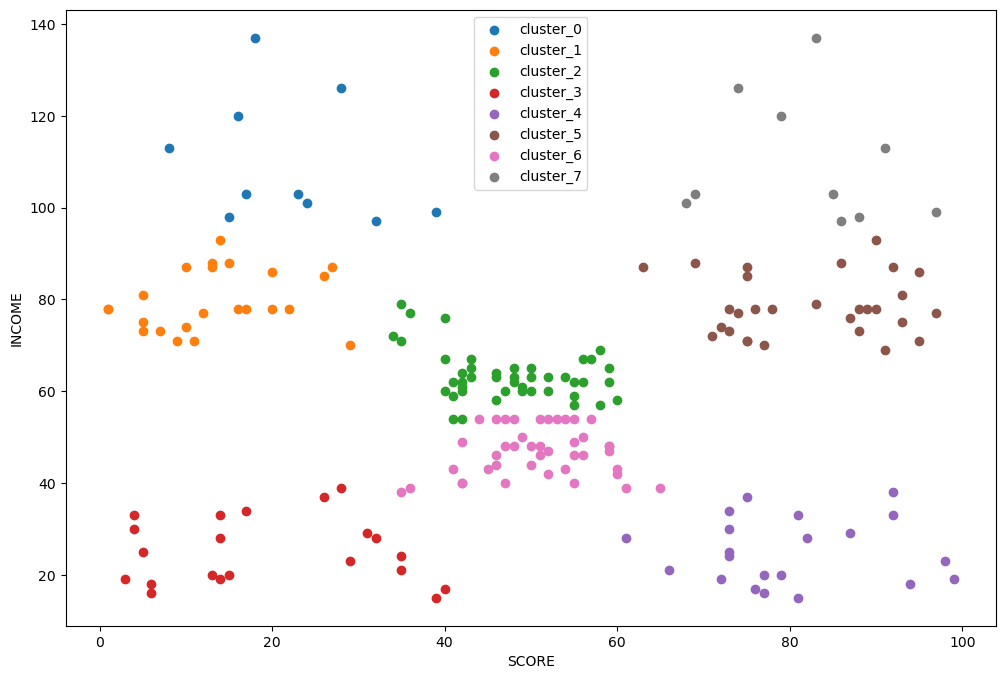

In [36]:
plt.figure(figsize=(12,8))

plt.scatter(df8.score, df8.income, label='cluster_0') 
plt.scatter(df1.score, df1.income, label='cluster_1') 
plt.scatter(df2.score, df2.income,  label='cluster_2') 
plt.scatter(df3.score, df3.income, label='cluster_3')
plt.scatter(df4.score, df4.income, label='cluster_4') 
plt.scatter(df5.score, df5.income, label='cluster_5') 
plt.scatter(df6.score, df6.income, label='cluster_6') 
plt.scatter(df7.score, df7.income, label='cluster_7') 

plt.legend()
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

<AxesSubplot:xlabel='score', ylabel='income'>

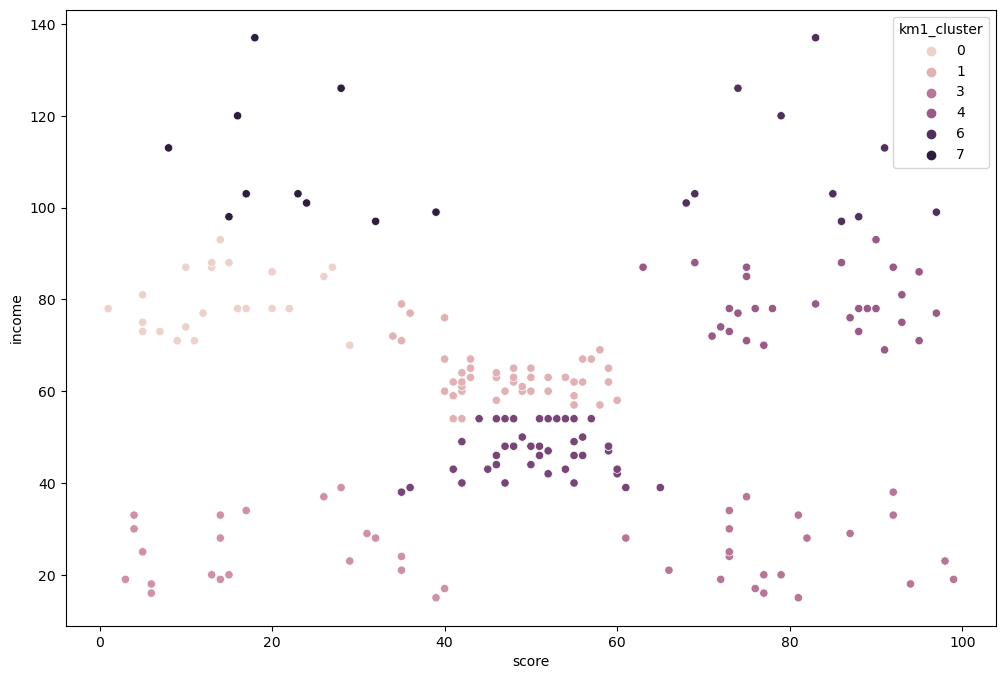

In [39]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='score', y='income', hue='km1_cluster' )

# Within-Cluster Sum of Squares (WCSS): How many clusters are good enough?

In [41]:
wcss = []

for i in range(1,15):
    km2 = KMeans(n_clusters=i)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

In [42]:
wcss

[269981.28,
 186362.95600651755,
 106348.37306211118,
 73679.78903948836,
 44454.47647967974,
 40845.0821432953,
 31644.319037920206,
 28707.285166868016,
 23472.797596263386,
 21801.859521035793,
 18232.14437943333,
 15810.838613705502,
 15588.581712942536,
 13391.212261612261]

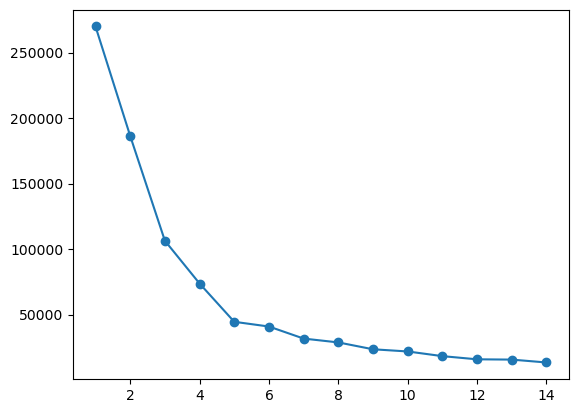

In [44]:
plt.plot(range(1,15), wcss, marker='o')

In [45]:
from kneed import KneeLocator

In [46]:
kne = KneeLocator(range(1,15), wcss, curve='convex', direction='decreasing')

In [47]:
kne

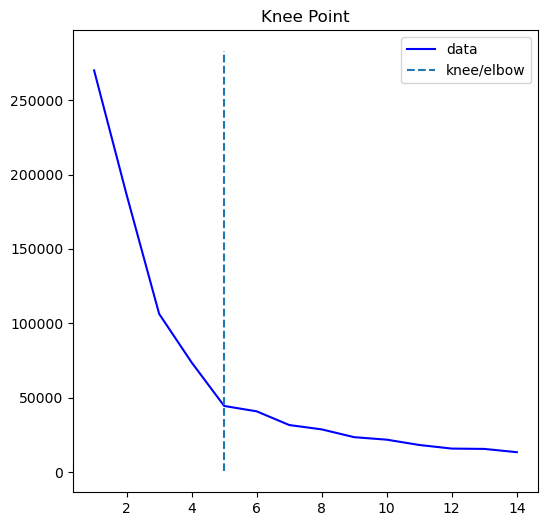

In [48]:
kne.plot_knee()

In [49]:
kne.knee

5

# Finally

In [52]:
km3 = KMeans(n_clusters=5)

In [53]:
df['km1_cluster'] = km3.fit_predict(df[['income', 'score']])
df.head()

,age,income,score,km1_cluster
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [55]:
km3.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

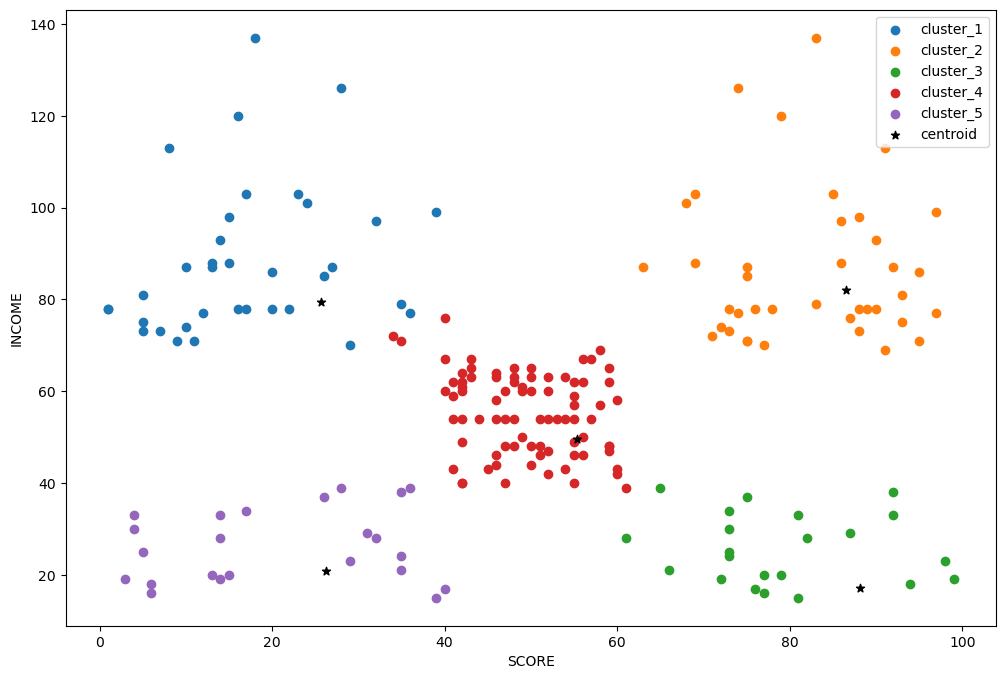

In [58]:
df1 = df[df.km1_cluster==0]
df2 = df[df.km1_cluster==1]
df3 = df[df.km1_cluster==2]
df4 = df[df.km1_cluster==3]
df5 = df[df.km1_cluster==4]

plt.figure(figsize=(12,8))
 
plt.scatter(df1.score, df1.income, label='cluster_1') 
plt.scatter(df2.score, df2.income,  label='cluster_2') 
plt.scatter(df3.score, df3.income, label='cluster_3')
plt.scatter(df4.score, df4.income, label='cluster_4') 
plt.scatter(df5.score, df5.income, label='cluster_5') 

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], label='centroid', color='black', marker='*')

plt.legend()
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()